# MATH 248 HW #2

**Due Monday Oct 3 at midnight on BrightSpace**. Please submit a Jupyter notebook or a Python script.

Susceptible-Infectious-Susceptible epidemic mode: consider a disease spread in a population of individuals, without births, deaths, and migrations. Let $S_n$ and $I_n$ be the number of susceptible and infectious individuals on day $n$. The total population $N=S_n+I_n$ remains constant. A susceptible individual has a probability $1-e^{-\beta I_n/N}$ to be infected and become infectious on day $n$, where $\beta$ is the transmission rate. An infectious individual recovers with a probability $\gamma$ on each day, and becomes susceptible upon recovery without gaining immunity. Thus, the change in $I_n$ can be modeled as
$$
I_{n+1} - I_n =(N - I_n) \left(1-e^{-\beta I_n/N}\right) - \gamma I_n
$$

1. (10 points) Write a function SIS to compute the solution of the above model with an initial condition $I_0$, the parameters values $\beta$, $\gamma$ and $N$, for a period of time $T$. 
  * Arguments:
     * T: the last time point
     * I0: the initial number of infectious individuals
     * beta: the transmission rate
     * gamma: the recovery rate
     * N: the total population
  * Return value: an array of length $T+1$, holding $I_0$, $I_1$, ..., $I_T$.

2. (10 points) This model has a unique nonnegative attactor, which is a fixed point. This fixed point changes as the transmission rate $\beta$ changes. Make a plot showing how the fixed point changes with beta, for $N=2000$, $\gamma=0.25$, and $\beta$ values of $0.20$, $0.21$, $0.22$, ..., $1$.


3. (10 points) Given an initial condition $I_0=1$, and parameter values $\gamma=0.25$, $N=2000$, find the $\beta$ value that maximizes the rate of change of $dI_{10}/d\beta$.
  * Hint: 
    * This is where $d^2I_{10}/d\beta^2 = 0$.
    * You may use numerical differentiation to approximate the second derivative.
    * The answer lies between 1 and 4.
  

Solution to 1.

In [15]:
# importing various functions.
from math import exp
from numpy import zeros
from numpy import arange
from numpy import repeat
from scipy.optimize import fsolve
from matplotlib.pyplot import plot
from functools import reduce

# the generic difference equation solver from lecture.
# returns x0, x1, x2, ..., xN in a matrix, each row corresponds to a time point
def difference(f, x0, p, N):
    # the dimension for the difference equations (the number of equations)
    if type(x0) is list:
        m = len(x0)
    else:
        m = 1
    # the number of times points
    # we will store the solution in V
    V = zeros((N+1, m))
    V[0] = x0
    for i in range(1, N+1):
        if p is None:
            V[i] = f(V[i-1])
        else:
            V[i] = f(V[i-1], p)
    return(V)

# making the difference equation
def f(I0, p):
    b = p[0]
    gam = p[1]
    n = p[2]
    return ((n - I0) * (1 - exp((-b * I0)/n)) - (gam * I0) + I0)

# difference equation solver using the function defined directly above
def SIS(T, I0, b, gam, n):
    return difference(f, I0, [b, gam, n], T)

Solution to question 2.

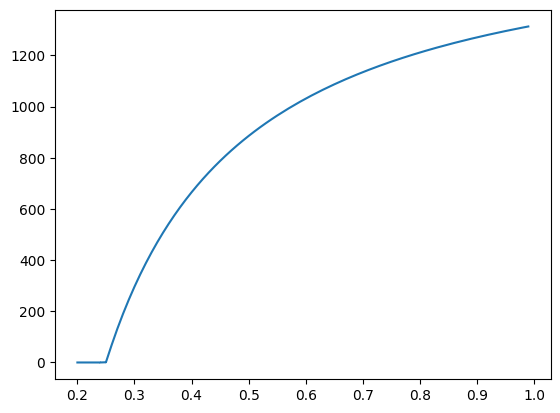

In [16]:
# setting gamma and population constant
gam = 0.25
n = 2000

# creating the lists that will hold the last 10 points of the difference equations using beta = 0.2, 0.21, 0.22, ..., 1.
X = []
rs = []

# setting beta to span from 0.2 to 1 with 0.01 intervals.
for i in arange(0.2, 1, 0.01):
    b=i

    # running the difference equation solver. definitely don't need to do 1000 runs each time, but performance isn't really an issue so who cares.
    x = SIS(1000, 1, b, 0.25, 2000)

    # adding the last 10 values of the difference equation to the list holding all the different fixed points. if our equation was giving periodic solutions I would take more.
    X = X + x[991:1001].tolist()

    # to accurately plot the graph, each of the 10 points taken from the last points of the difference equation need to be represented at the same beta value.
    # this list keeps track of the betas so that our x-y axis correlation makes sense.
    rs = rs + repeat(i, 10).tolist()

# plotting our well earned graph.
plot(rs, X)

Note that the curve doesn't start until after 0.25, which is to be expected with a gamma of 0.25, as the recovery will outweigh the transmission.

Solution to question 3.

In [17]:
# given a b value, fbetacomp will give you the tenth iteration of SIS with the parameters I0 = 1, gamma = 0.25, and n = 2000.
def fbetacomp(b):
    return SIS(10, 1, b, 0.25, 2000)[10]

# numerical second derivative calculator given a function and a point
def D2(f, x, h=1e-5):
    return (f(x+h) + f(x-h) - 2*f(x)) / (h*h)

# numerical second derivative for fbetacomp
def d2f(x):
    return D2(fbetacomp, x)

# plugging the second derivative of fbetacomp into fsolve should give us the root of d2f.
sol = fsolve(d2f, 1.552)
print(sol)

[1.31219633]


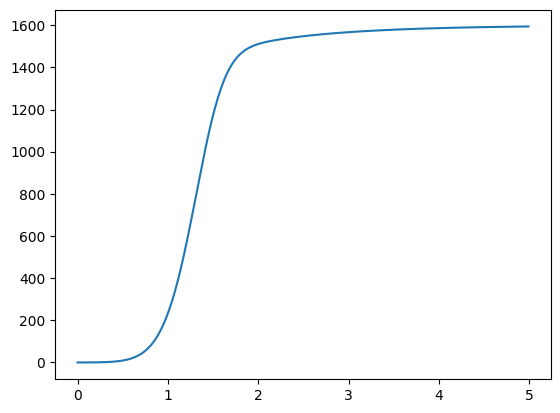

In [18]:
# a graph of fbetacomp to show how the derivatives might work, and to ensure our answer is correct.
z = zeros(500)
n=0
for i in arange(0, 5, 0.01):
    z[n] = fbetacomp(i)
    n += 1
    
plot(arange(0, 5, 0.01), z)

We see that the inflection point, where the second derivative will be zero, looks pretty close to 1.31, so this seems right.

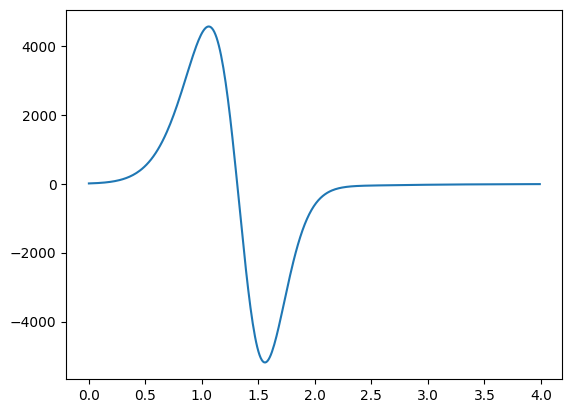

In [19]:
# a graph of the second derivative of I10 with despect to beta. we should see it cross the x-axis around 1.31.
c = zeros(400)
n=0
for i in arange(0, 4, 0.01):
    c[n] = d2f(i)
    n += 1
    
plot(arange(0, 4, 0.01), c)




Cross the x-axis around 1.31 it does.